In [7]:
import numpy as np
import networkx as nx
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
# import random
# import math

In [8]:
def generatePlanarGraph(nr_points, seed=123):
   
    np.random.seed(seed)
    # Generate random unique points
    points = np.random.randint(0, 101, (int(nr_points*1.2), 2))
    points = np.unique(points, axis=0)
    points = points[np.random.choice(len(points), nr_points, replace=False), :]



    # Perform Delaunay triangulation
    tri = Delaunay(points)
    simplices = tri.simplices.copy()
    
    graph = nx.Graph()
    
    for i, coords in enumerate(points):
        graph.add_node(f"{i}", x=coords[0], y=coords[1]) #pos = tuple(coords))
        
    nodes = list(graph.nodes)

    nx.set_node_attributes(graph, 
                           values = dict(zip(nodes, np.random.randint( 4, 20, size = nr_points))), 
                           name = "n_customers")
    nx.set_node_attributes(graph, 
                           values = dict(zip(nodes, np.random.randint(15,400, size = nr_points))), 
                           name = "demand")
    nx.set_node_attributes(graph, 
                           values = dict(zip(nodes, np.random.randint(15,100, size = nr_points))), 
                           name = "workload")

    
    for triang in simplices:
        for idx1, idx2 in [[0,1],[1,2], [2,0]]:
            o, d = f"{triang[idx1]}", f"{triang[idx2]}"
            if (o,d) not in graph.edges and (d,o) not in graph.edges:
                graph.add_edge(o,d, 
                           distance = np.sqrt(pow(points[triang[idx1]][0] - points[triang[idx2]][0], 2) \
                                       + pow(points[triang[idx1]][1] - points[triang[idx2]][1],2))
                          )

    return graph

In [16]:
def draw_graph(g):
    # Draw the graph
    fig, ax = plt.subplots(figsize=(15, 15))
    pos =  dict(zip(g.nodes, zip(nx.get_node_attributes(g, 'x').values(), 
                                 nx.get_node_attributes(g, 'y').values() )))
    nx.draw(g, with_labels=True, node_size=400, 
            pos = pos, 
            node_color='lightgreen')
#     plt.axis("on")
#     ax.set_xlim(0, 100)
#     ax.set_ylim(0,100)
#     ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    plt.show()

In [10]:
def graph_is_connectd(g):
    sp_dict = nx.shortest_path(g)
    for o in g.nodes:
        if o not in sp_dict:
            return False
        for d in g.nodes:
            if d not in sp_dict[o]:
                return False
    return True


In [12]:
g = generatePlanarGraph(500, seed=1111)
# draw_graph(g)

In [14]:
# list(zip(nx.get_node_attributes(g, 'x').values(), nx.get_node_attributes(g, 'y').values() ))

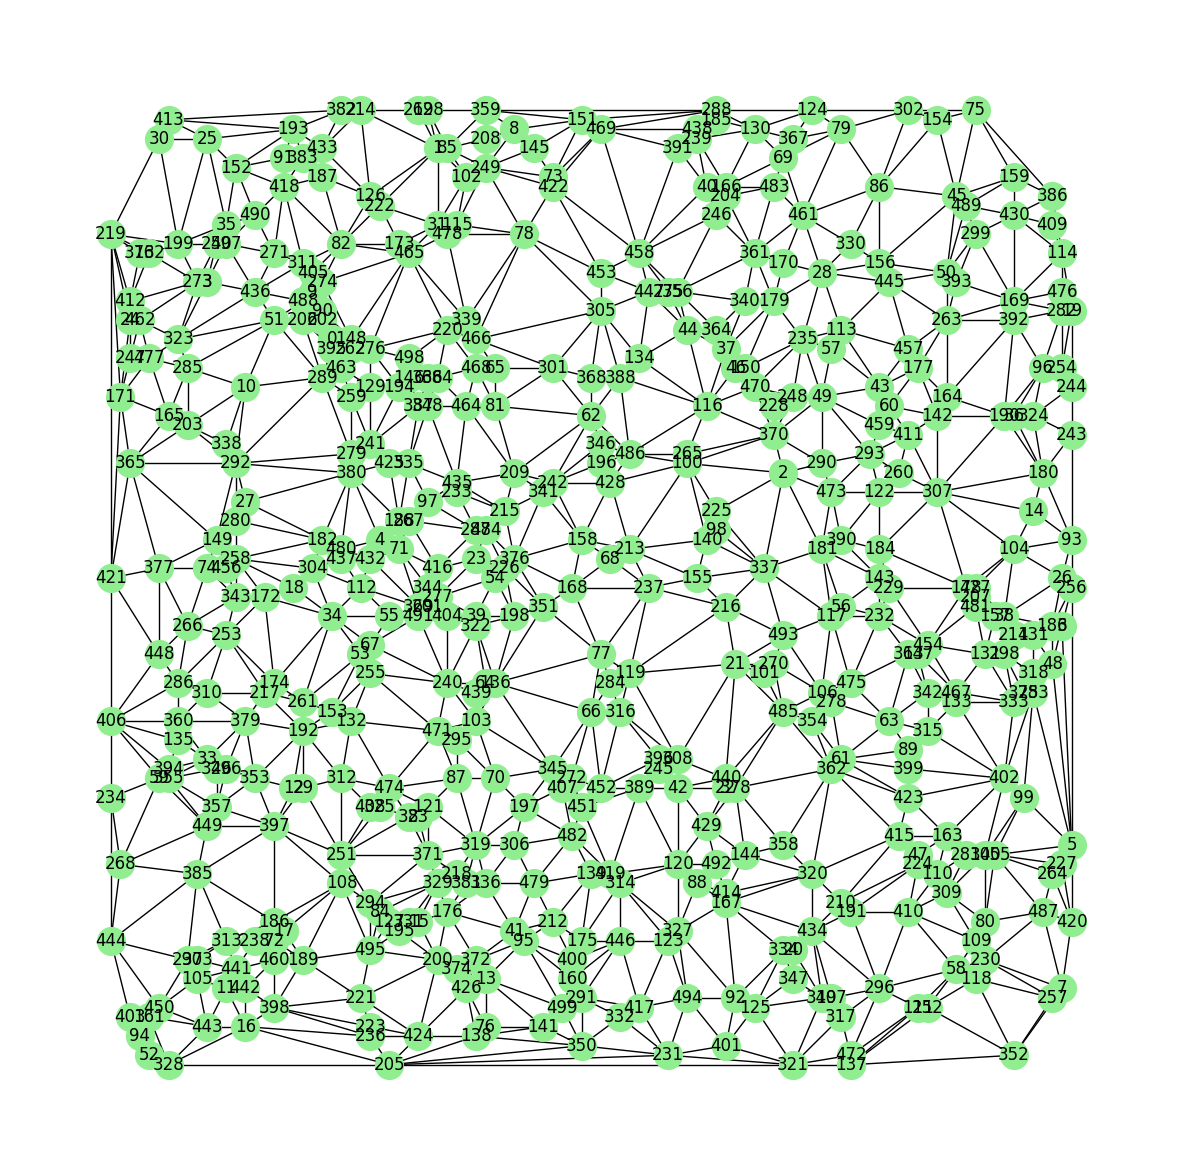

In [17]:
draw_graph(g)

In [35]:
graph_is_connectd(g)

True

In [58]:
g.nodes['202']
# g.edges[('0', '202')]

{'pos': (22, 78), 'n_customers': 13, 'demand': 163, 'workload': 86}

In [55]:
graph

In [5]:
import os

# Define the directory path and file extension
directory_path = 'generatedPlanarInstancesData'
file_extension = '.graphml'

if not os.path.exists(directory_path):
    os.makedirs(directory_path, exist_ok=True)

for graph_size in [500,600,700]:
    for graph_idx in range(10):
        graph = generatePlanarGraph(graph_size, seed=graph_size * graph_idx)
        
        graph_name = f"planar{graph_size}_G{graph_idx}"        
        output_file_path = f"{directory_path}/{graph_name}{file_extension}"
        
        nx.write_graphml(graph, output_file_path)            
            


In [77]:
# for creating non even graphs
points = np.zeros((0,2), dtype = int)

for centerX, centerY in zip(np.random.randint(10, 80, size=10), np.random.randint(10, 80, size=10)):
    R = np.random.randint(10, 20)
    r = R * np.sqrt(np.random.rand(30))
    theta = np.random.rand(30) * 2 * np.pi

    x = np.rint(centerX + r * np.cos(theta))
    y = np.rint(centerY + r * np.sin(theta))

    points = np.append(points, np.array([x,y]).T, axis=0)

for centerX, centerY in zip(np.random.randint(10, 80, size=10), np.random.randint(10, 80, size=10)):
    R = np.random.randint(20, 30)
    r = R * np.sqrt(np.random.rand(30))
    theta = np.random.rand(30) * 2 * np.pi

    x = np.rint(centerX + r * np.cos(theta))
    y = np.rint(centerY + r * np.sin(theta))
    
    points = np.append(points, np.array([x,y]).T, axis=0)
    
points = np.unique(points, axis=0)[:500]